In [1]:
import os
import pathlib
import pickle

In [11]:
data_dir = "input/data_pickles/"
glove_dict_dir = 'input/embeddings/glove_dict.pickle'

In [7]:
with open(glove_dict_dir, 'rb') as file:
    glove_dict = pickle.load(file)

In [10]:
len(glove_dict)

400000

In [13]:
data_dict = {}
for filename in os.listdir(data_dir):
    if 'sentence' in filename:
        with open(data_dir + filename, "rb") as f:
            data_dict[filename] = pickle.load(f)

Investigate OOV Proportion

In [14]:
data_dict.keys()

dict_keys(['test_list_sentence1.txt', 'test_list_sentence2.txt', 'train_list_sentence1.txt', 'dev_list_sentence2.txt', 'dev_list_sentence1.txt', 'train_list_sentence2.txt'])

In [17]:
def investigate_oov(data_file, glove_vocab):
    
    word_counter = 0
    oov_counter = 0
    oov_set = set()
    
    for sentence in data_file:
        for word in sentence:
            word_counter += 1
            if word.lower() not in glove_vocab:
                oov_counter += 1
                oov_set.add(word.lower())
                
    return word_counter, oov_counter, oov_set

In [19]:
def calculate_oov_prop(data_file, glove_vocab):
    
    word_counter, oov_counter, _ = investigate_oov(data_file, glove_vocab)
    
    return oov_counter / word_counter

In [20]:
calculate_oov_prop(
    data_dict['test_list_sentence1.txt'],
    glove_dict.keys()
)

0.008657278714271261

In [21]:
[len(key) for key in data_dict.keys()]

[23, 23, 24, 22, 22, 24]

In [22]:
for filename in data_dict:
    
    oov_prop = calculate_oov_prop(
        data_dict[filename],
        glove_dict.keys()
    )
    
    print(f'{filename:<26}: {oov_prop:.1%}')

test_list_sentence1.txt   : 0.9%
test_list_sentence2.txt   : 3.1%
train_list_sentence1.txt  : 0.8%
dev_list_sentence2.txt    : 3.1%
dev_list_sentence1.txt    : 0.8%
train_list_sentence2.txt  : 3.1%


Evaluate Logistic Regression

In [3]:
from utils.read_data import read_data
# from TFIDF.logistic_regression_train import logistic_regression_train
from TFIDF.logistic_regression_test import logistic_regression_test

In [4]:
def get_test_data(data_dir):
    data = read_data(data_dir)
    return data[3:]

In [5]:
# Reads the data from from pickle files
hired_data_dir = '../data/matched/reformatted/hired'
interviewed_data_dir = '../data/matched/reformatted/interviewed'

hired_data = get_test_data(hired_data_dir)
interviewed_data = get_test_data(interviewed_data_dir)

/home/acp19tag/miniconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/acp19tag/miniconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/acp19tag/miniconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking c

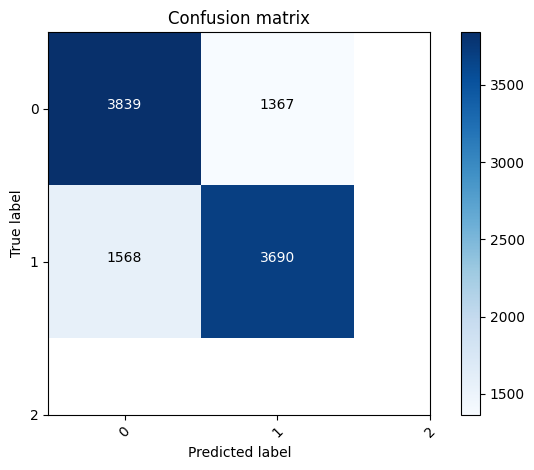

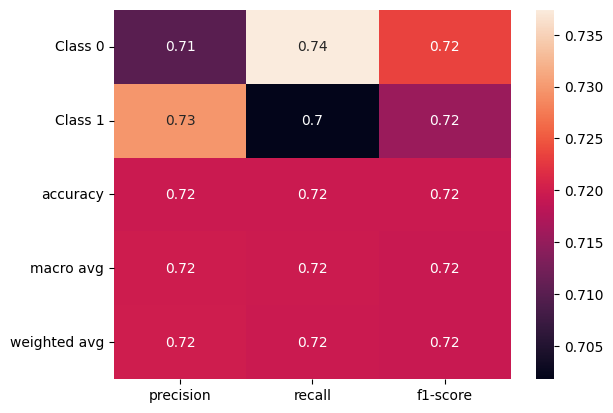

In [6]:
logistic_regression_test(hired_data)

/home/acp19tag/miniconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/acp19tag/miniconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/acp19tag/miniconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking c

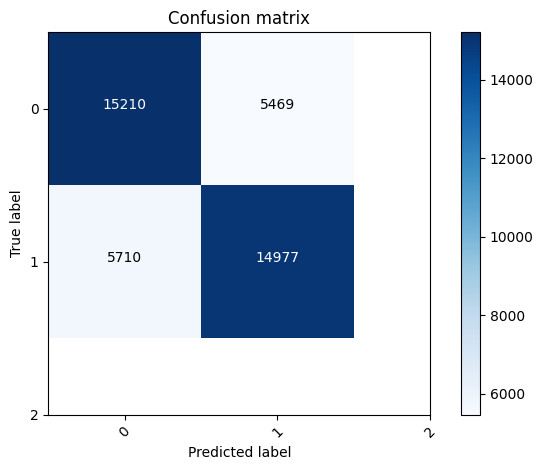

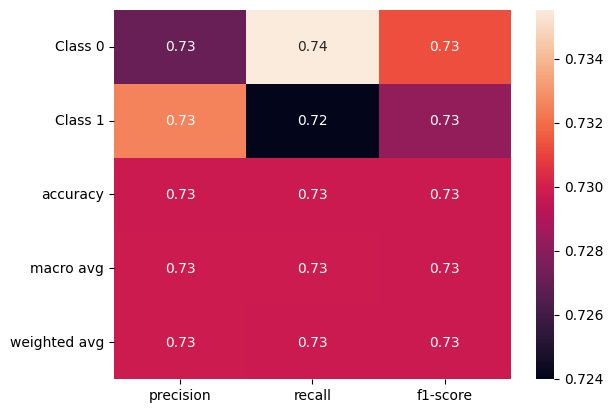

In [7]:
logistic_regression_test(interviewed_data)